In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df1 = df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
print(df['area_type'].value_counts())


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


In [8]:
print(df['availability'].value_counts())


availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64


In [9]:
print(df['location'].value_counts())


location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("--------------------------------")
value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-----------

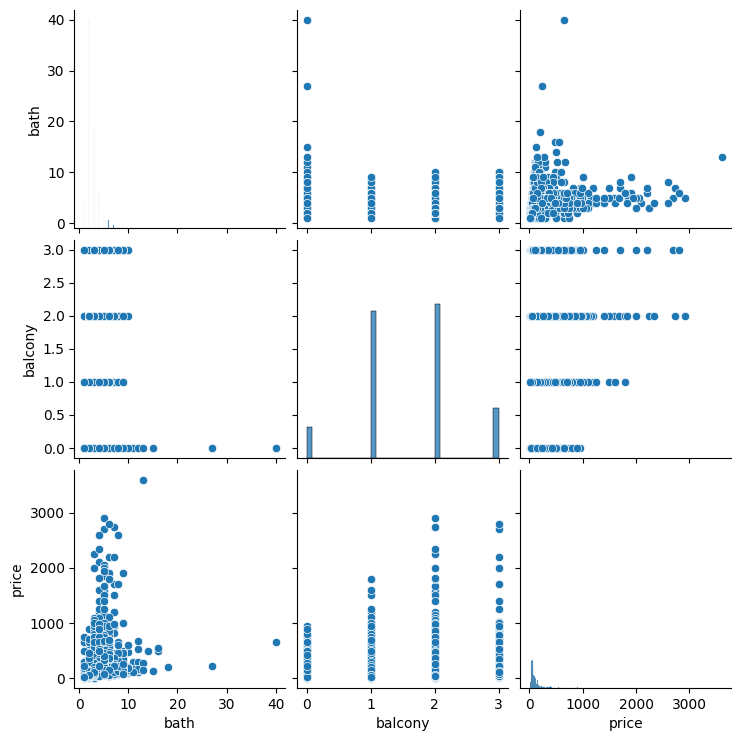

In [12]:
sns.pairplot(df)

<Axes: >

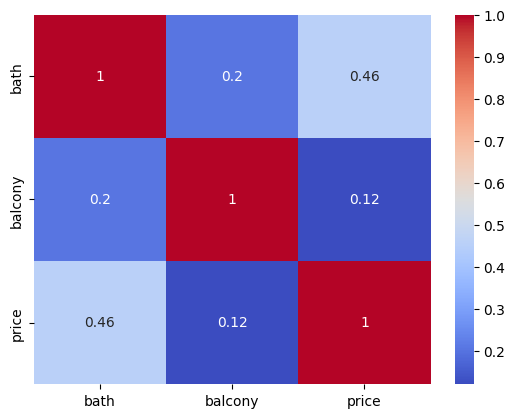

In [13]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [14]:
import pandas as pd
import numpy as np

def extract_bhk(x):

    try:
        return int(x.split(' ')[0])
    except:
        return np.nan

df['size'] = df['size'].apply(extract_bhk)


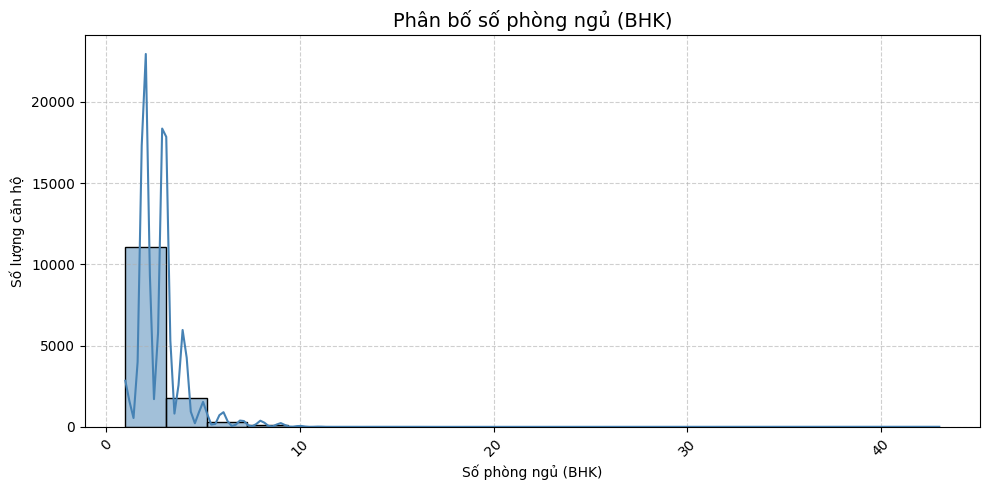

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['size'].dropna(), bins=20, kde=True, color='steelblue')

plt.title('Phân bố số phòng ngủ (BHK)', fontsize=14)
plt.xlabel('Số phòng ngủ (BHK)')
plt.ylabel('Số lượng căn hộ')

plt.ticklabel_format(style='plain', axis='y')   
plt.xticks(rotation=45, fontsize=10)            
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



<Axes: >

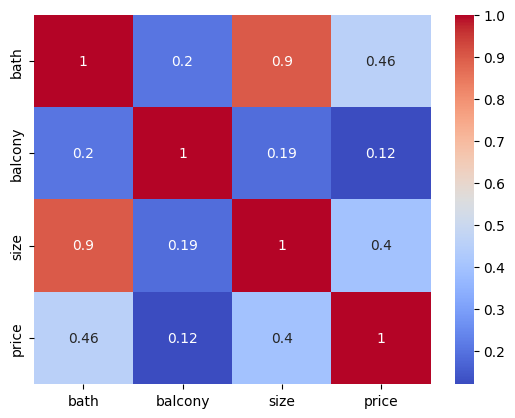

In [16]:
num_vars = ["bath", "balcony", "size", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [17]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200,2.0,1.0,51.00


In [18]:
def convert_avail(str):
    if str == "Ready To Move":
        return 1
    else:
        return 0
df["is_avail"] = df["availability"].apply(convert_avail)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,is_avail
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00,1
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00,1
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200,2.0,1.0,51.00,1


C:\Users\thaip\AppData\Local\Temp\ipykernel_13372\437455733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avail_count.index.astype(str), y=avail_count.values, palette='Blues')


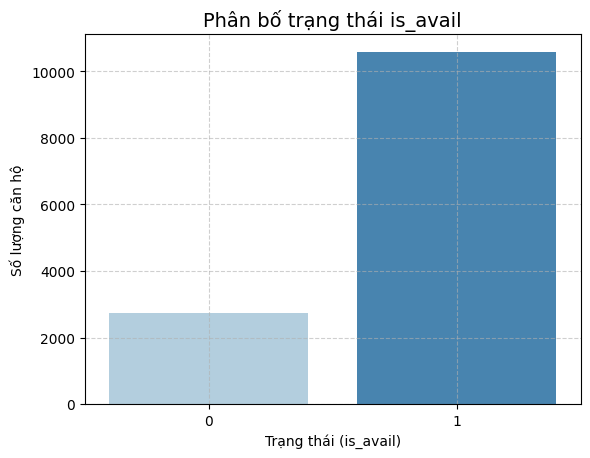

In [19]:
avail_count = df["is_avail"].value_counts().sort_index()
sns.barplot(x=avail_count.index.astype(str), y=avail_count.values, palette='Blues')

plt.title('Phân bố trạng thái is_avail', fontsize=14)
plt.xlabel('Trạng thái (is_avail)')
plt.ylabel('Số lượng căn hộ')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<Axes: >

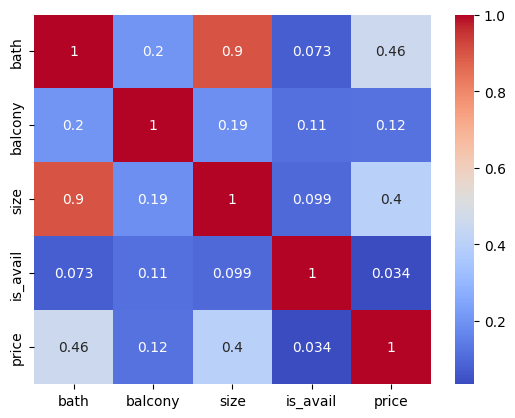

In [20]:
num_vars = ["bath", "balcony", "size","is_avail", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [21]:
df.isnull().sum() 

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
is_avail           0
dtype: int64

In [22]:
df.isnull().mean()*100 

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
is_avail         0.000000
dtype: float64

In [23]:
df2 = df.drop('society', axis='columns')
df2.shape


(13320, 9)

In [24]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
is_avail         0
dtype: int64

In [25]:
df3 = df2.dropna()
df3.shape

(13246, 9)

In [26]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,is_avail
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00,1
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,1
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00,1


In [27]:
df3 = df3.drop(columns = ["availability"])
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,is_avail
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,0
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00,1
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00,1
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,1
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00,1


In [28]:
total_sqft_float = []
for str_val in df3['total_sqft']:
    try:
        total_sqft_float.append(float(str_val))
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_float.append((float(temp[0])+float(temp[-1]))/2)
        except:
            total_sqft_float.append(np.nan)

In [29]:
df4 = df3.reset_index(drop=True)

In [30]:
df5 = df4.join(pd.DataFrame({'total_sqft_float':total_sqft_float}))
df5.head() 

,area_type,location,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,0,1056.0
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00,1,2600.0
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00,1,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,1,1521.0
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00,1,1200.0


In [31]:
df5.isnull().sum()

area_type            0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
is_avail             0
total_sqft_float    46
dtype: int64

In [32]:
df6 = df5.dropna()
df6.shape


(13200, 9)

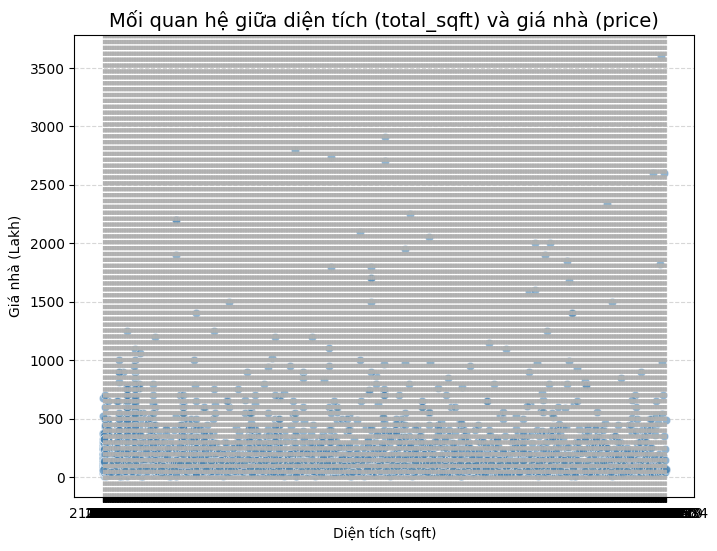

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='total_sqft', y='price', data=df6, alpha=0.6, color='steelblue')

plt.title('Mối quan hệ giữa diện tích (total_sqft) và giá nhà (price)', fontsize=14)
plt.xlabel('Diện tích (sqft)')
plt.ylabel('Giá nhà (Lakh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Axes: xlabel='total_sqft_float'>

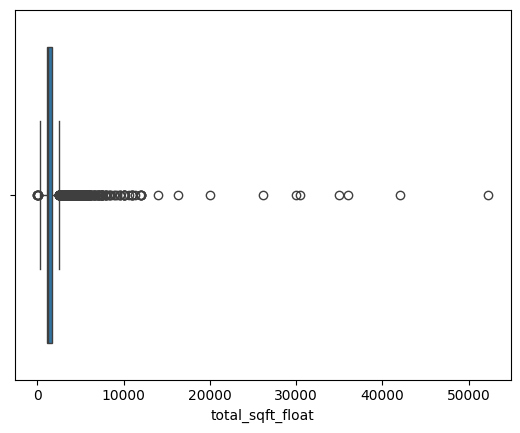

In [34]:
sns.boxplot(x = df6['total_sqft_float'])


In [35]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07,0,1056.0
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00,1,2600.0
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00,1,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00,1,1521.0
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00,1,1200.0


In [36]:
!pip install statsmodels


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
df6.isnull().sum()


area_type           0
location            0
size                0
total_sqft          0
bath                0
balcony             0
price               0
is_avail            0
total_sqft_float    0
dtype: int64

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df6[['bath', 'size',"balcony"]] 
X = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   Feature       VIF
0    const  8.374591
1     bath  5.187029
2     size  5.164208
3  balcony  1.034605


In [39]:
df7 = df6.drop(columns = ["location"])
df7.head()

,area_type,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float
0,Super built-up Area,2.0,1056,2.0,1.0,39.07,0,1056.0
1,Plot Area,4.0,2600,5.0,3.0,120.00,1,2600.0
2,Built-up Area,3.0,1440,2.0,3.0,62.00,1,1440.0
3,Super built-up Area,3.0,1521,3.0,1.0,95.00,1,1521.0
4,Super built-up Area,2.0,1200,2.0,1.0,51.00,1,1200.0


In [40]:
q_low = df6['total_sqft_float'].quantile(0.01)
q_hi  = df6['total_sqft_float'].quantile(0.99)
df7 = df7[(df7['total_sqft_float'] >= q_low) & (df7['total_sqft_float'] <= q_hi)]
df7.head()

,area_type,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float
0,Super built-up Area,2.0,1056,2.0,1.0,39.07,0,1056.0
1,Plot Area,4.0,2600,5.0,3.0,120.00,1,2600.0
2,Built-up Area,3.0,1440,2.0,3.0,62.00,1,1440.0
3,Super built-up Area,3.0,1521,3.0,1.0,95.00,1,1521.0
4,Super built-up Area,2.0,1200,2.0,1.0,51.00,1,1200.0


<Axes: xlabel='total_sqft_float'>

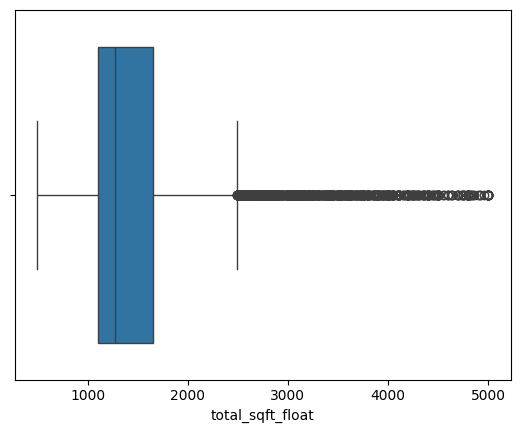

In [41]:
sns.boxplot(x = df7['total_sqft_float'])


In [42]:
df7.head()

,area_type,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float
0,Super built-up Area,2.0,1056,2.0,1.0,39.07,0,1056.0
1,Plot Area,4.0,2600,5.0,3.0,120.00,1,2600.0
2,Built-up Area,3.0,1440,2.0,3.0,62.00,1,1440.0
3,Super built-up Area,3.0,1521,3.0,1.0,95.00,1,1521.0
4,Super built-up Area,2.0,1200,2.0,1.0,51.00,1,1200.0


In [43]:
df7.shape

(12954, 8)

In [44]:
df6.shape

(13200, 9)

In [45]:
df7.head()

,area_type,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float
0,Super built-up Area,2.0,1056,2.0,1.0,39.07,0,1056.0
1,Plot Area,4.0,2600,5.0,3.0,120.00,1,2600.0
2,Built-up Area,3.0,1440,2.0,3.0,62.00,1,1440.0
3,Super built-up Area,3.0,1521,3.0,1.0,95.00,1,1521.0
4,Super built-up Area,2.0,1200,2.0,1.0,51.00,1,1200.0


In [46]:
import pandas as pd

# Giả sử df6 là DataFrame gốc
# Cột cần mã hoá: 'area_type'

df7_encoded = pd.get_dummies(df7, columns=['area_type'], prefix='area', drop_first=False)

print(df7_encoded.head())

   size total_sqft  bath  balcony   price  is_avail  total_sqft_float  \
0   2.0       1056   2.0      1.0   39.07         0            1056.0   
1   4.0       2600   5.0      3.0  120.00         1            2600.0   
2   3.0       1440   2.0      3.0   62.00         1            1440.0   
3   3.0       1521   3.0      1.0   95.00         1            1521.0   
4   2.0       1200   2.0      1.0   51.00         1            1200.0   

   area_Built-up  Area  area_Carpet  Area  area_Plot  Area  \
0                False              False            False   
1                False              False             True   
2                 True              False            False   
3                False              False            False   
4                False              False            False   

   area_Super built-up  Area  
0                       True  
1                      False  
2                      False  
3                       True  
4                       True  


In [47]:
# --- Sau khi đã tạo df7_encoded ---
df7_encoded.columns = df7_encoded.columns.str.replace(' ', '_').str.replace('__', '_')
df7_encoded.head()

,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float,area_Built-up_Area,area_Carpet_Area,area_Plot_Area,area_Super_built-up_Area
0,2.0,1056,2.0,1.0,39.07,0,1056.0,False,False,False,True
1,4.0,2600,5.0,3.0,120.00,1,2600.0,False,False,True,False
2,3.0,1440,2.0,3.0,62.00,1,1440.0,True,False,False,False
3,3.0,1521,3.0,1.0,95.00,1,1521.0,False,False,False,True
4,2.0,1200,2.0,1.0,51.00,1,1200.0,False,False,False,True


In [48]:
cols_onehot = [c for c in df7_encoded.columns if c.startswith('area_')]
df7_encoded[cols_onehot] = df7_encoded[cols_onehot].astype(int)


In [49]:
df7_encoded.head()

,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float,area_Built-up_Area,area_Carpet_Area,area_Plot_Area,area_Super_built-up_Area
0,2.0,1056,2.0,1.0,39.07,0,1056.0,0,0,0,1
1,4.0,2600,5.0,3.0,120.00,1,2600.0,0,0,1,0
2,3.0,1440,2.0,3.0,62.00,1,1440.0,1,0,0,0
3,3.0,1521,3.0,1.0,95.00,1,1521.0,0,0,0,1
4,2.0,1200,2.0,1.0,51.00,1,1200.0,0,0,0,1


In [50]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df7_encoded['total_sqft_log'] = np.log1p(df7_encoded['total_sqft_float'])

scaler = StandardScaler()
df7_encoded['total_sqft_scaled'] = scaler.fit_transform(df7_encoded[['total_sqft_log']])


In [51]:
df7_encoded.head()

,size,total_sqft,bath,balcony,price,is_avail,total_sqft_float,area_Built-up_Area,area_Carpet_Area,area_Plot_Area,area_Super_built-up_Area,total_sqft_log,total_sqft_scaled
0,2.0,1056,2.0,1.0,39.07,0,1056.0,0,0,0,1,6.963190,-0.654972
1,4.0,2600,5.0,3.0,120.00,1,2600.0,0,0,1,0,7.863651,1.608202
2,3.0,1440,2.0,3.0,62.00,1,1440.0,1,0,0,0,7.273093,0.123922
3,3.0,1521,3.0,1.0,95.00,1,1521.0,0,0,0,1,7.327781,0.261372
4,2.0,1200,2.0,1.0,51.00,1,1200.0,0,0,0,1,7.090910,-0.333967


In [52]:
df8 = df7_encoded.drop(columns = ["total_sqft_float", "total_sqft_log", "total_sqft"])
df8.head()

,size,bath,balcony,price,is_avail,area_Built-up_Area,area_Carpet_Area,area_Plot_Area,area_Super_built-up_Area,total_sqft_scaled
0,2.0,2.0,1.0,39.07,0,0,0,0,1,-0.654972
1,4.0,5.0,3.0,120.00,1,0,0,1,0,1.608202
2,3.0,2.0,3.0,62.00,1,1,0,0,0,0.123922
3,3.0,3.0,1.0,95.00,1,0,0,0,1,0.261372
4,2.0,2.0,1.0,51.00,1,0,0,0,1,-0.333967


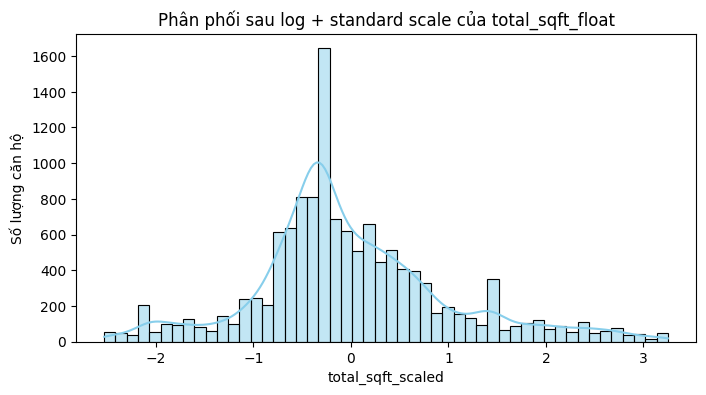

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df8['total_sqft_scaled'], bins=50, kde=True, color='skyblue')
plt.title('Phân phối sau log + standard scale của total_sqft_float')
plt.xlabel('total_sqft_scaled')
plt.ylabel('Số lượng căn hộ')
plt.show()


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

df8['size_log'] = np.log1p(df8['size'])
df8['bath_log'] = np.log1p(df8['bath'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df8[['size_log', 'bath_log']])

pca = PCA(n_components=1)
df8['size_bath_pca'] = pca.fit_transform(X_scaled)

print("Tỷ lệ phương sai giữ lại:", pca.explained_variance_ratio_)
print(df8[['size', 'bath', 'size_bath_pca']].head())


Tỷ lệ phương sai giữ lại: [0.93922164]
   size  bath  size_bath_pca
0   2.0   2.0      -0.895572
1   4.0   5.0       2.150531
2   3.0   2.0      -0.148514
3   3.0   3.0       0.565177
4   2.0   2.0      -0.895572


In [55]:
df8.head()

,size,bath,balcony,price,is_avail,area_Built-up_Area,area_Carpet_Area,area_Plot_Area,area_Super_built-up_Area,total_sqft_scaled,size_log,bath_log,size_bath_pca
0,2.0,2.0,1.0,39.07,0,0,0,0,1,-0.654972,1.098612,1.098612,-0.895572
1,4.0,5.0,3.0,120.00,1,0,0,1,0,1.608202,1.609438,1.791759,2.150531
2,3.0,2.0,3.0,62.00,1,1,0,0,0,0.123922,1.386294,1.098612,-0.148514
3,3.0,3.0,1.0,95.00,1,0,0,0,1,0.261372,1.386294,1.386294,0.565177
4,2.0,2.0,1.0,51.00,1,0,0,0,1,-0.333967,1.098612,1.098612,-0.895572


In [56]:
df9 = df8.drop(columns = ["size", "bath","size_log", "bath_log"])
df9.head()

,balcony,price,is_avail,area_Built-up_Area,area_Carpet_Area,area_Plot_Area,area_Super_built-up_Area,total_sqft_scaled,size_bath_pca
0,1.0,39.07,0,0,0,0,1,-0.654972,-0.895572
1,3.0,120.00,1,0,0,1,0,1.608202,2.150531
2,3.0,62.00,1,1,0,0,0,0.123922,-0.148514
3,1.0,95.00,1,0,0,0,1,0.261372,0.565177
4,1.0,51.00,1,0,0,0,1,-0.333967,-0.895572


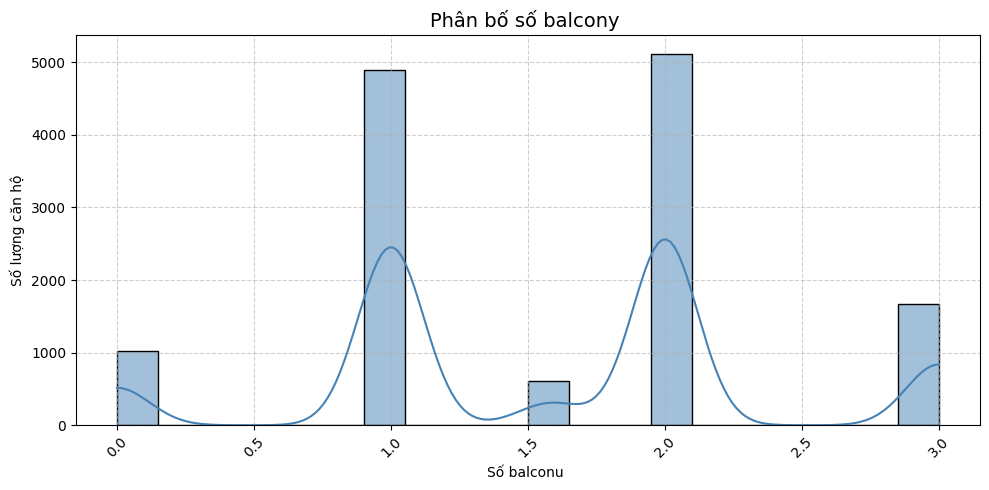

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(df2['balcony'].dropna(), bins=20, kde=True, color='steelblue')

plt.title('Phân bố số balcony ', fontsize=14)
plt.xlabel('Số balconu ')
plt.ylabel('Số lượng căn hộ')

plt.ticklabel_format(style='plain', axis='y')   
plt.xticks(rotation=45, fontsize=10)            
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [58]:
df9.head()

,balcony,price,is_avail,area_Built-up_Area,area_Carpet_Area,area_Plot_Area,area_Super_built-up_Area,total_sqft_scaled,size_bath_pca
0,1.0,39.07,0,0,0,0,1,-0.654972,-0.895572
1,3.0,120.00,1,0,0,1,0,1.608202,2.150531
2,3.0,62.00,1,1,0,0,0,0.123922,-0.148514
3,1.0,95.00,1,0,0,0,1,0.261372,0.565177
4,1.0,51.00,1,0,0,0,1,-0.333967,-0.895572


In [59]:
from sklearn.model_selection import train_test_split

X = df9.drop(columns=['price'])
y = df9['price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae  = mean_absolute_error(y_train, y_train_pred)
test_mae   = mean_absolute_error(y_test, y_test_pred)

train_r2   = r2_score(y_train, y_train_pred)
test_r2    = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
print(f"Train MAE:  {train_mae:.4f} | Test MAE:  {test_mae:.4f}")
print(f"Train R²:   {train_r2:.4f} | Test R²:   {test_r2:.4f}")


Train RMSE: 79.2097 | Test RMSE: 66.1976
Train MAE:  42.1622 | Test MAE:  39.7786
Train R²:   0.4913 | Test R²:   0.5236


In [63]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)


In [65]:
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1, 2, 5]  
}


In [66]:
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',    
    cv=3,            
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("✅ Best parameters:", grid.best_params_)
print("✅ Best cross-val R²:", grid.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
✅ Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'reg_lambda': 5, 'subsample': 0.8}
✅ Best cross-val R²: 0.5780231303340988


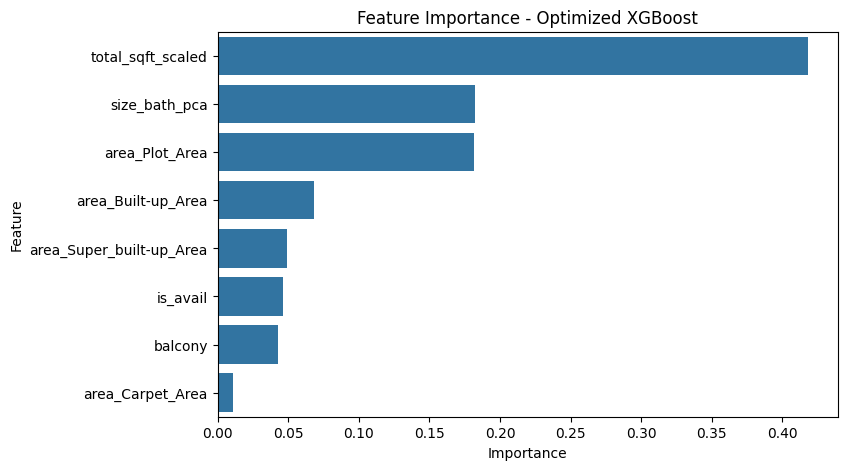

In [68]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grid.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance - Optimized XGBoost")
plt.show()



In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

train_r2   = r2_score(y_train, y_train_pred)
test_r2    = r2_score(y_test, y_test_pred)

train_mae  = mean_absolute_error(y_train, y_train_pred)
test_mae   = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²:   {train_r2:.4f}")
print(f"Test  R²:   {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
print(f"Train MAE:  {train_mae:.4f} | Test MAE:  {test_mae:.4f}")



Train R²:   0.6923
Test  R²:   0.6355
Train RMSE: 61.6053 | Test RMSE: 57.9037
Train MAE:  30.4242 | Test MAE:  30.6486


In [71]:
import joblib
best_model = grid.best_estimator_
joblib.dump(best_model, "xgboost_model.pkl")


['xgboost_model.pkl']